# Supervised Learning Template

![MTSU Data Science Institute](images/MTDataScienceInstituteHorizontal.jpg)

### Summary of Notebook
### ---------------------------
#### Created by Charlie H. Apigian, PhD.  - Interim Director of the Data Science Institute at MTSU
#### This template gives you a scope and baseline for importing, cleansing, and transforming the data as well as developing optimal models to make decisions.
<br>
#### Contents of Template and ML Process
- Frame the Business Problem
- Import Libraries
- Import Data
- Explore the Data
- Cleanse the Data
- Transform the Data
- Split the Data
- Select and Run the Model
- Fine Tune the Model

## Special Notes:
- All code is commented out using a #
- Any comments are on the same line as the code and start with ##
- All files will be in a root folder that has an images and data folder
- all files will be named data as examples and the main dataframe will be df_data

# --------------------------------------------------------------------------------
# XXXXXXXXXXXXX  What is the Business Problem XXXXXXXXXXXXX
# --------------------------------------------------------------------------------
- What is the expectation of analyzing the data?
- Is there a question to be answered?
- Is it completely exploratory?  (a lot of data and no questions)
- Is it a machine learning problem?
- A visualization or report may be all that is needed.

# --------------------------------------------------------------------------------
# XXXXXXXXXXXXXXXXXX  Import Libraries XXXXXXXXXXXXXXXXXX
# --------------------------------------------------------------------------------

In [3]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline  ##enables plots to automatically show without having to state plt.show()

#sns.set_style('whitegrid')  ##sets a style for how your graphs will look

### Seaborn styles
https://python-graph-gallery.com/104-seaborn-themes/

# --------------------------------------------------------------------------------
# XXXXXXXXXXXXXXXXXXX  Import Data XXXXXXXXXXXXXXXXXXX
# --------------------------------------------------------------------------------

## Import the data and create dataframes and arrays that can then be cleansed, transformed, and split.

### Import data from URL

In [ ]:
#import requests

#url_data="http://someurl.org/data.csv"

#df_data=pd.read_csv(url_data, index_col = 0, header = 0)

### Import csv file

In [ ]:
#df_data = pd.read_csv('data/data.csv', index_col = 0, header = 0)
##index_col = None will make the first column a regular column of data, instead of the index.

### Import Excel file

In [1]:
#df_data =  pd.ExcelFile('data/data.xlsx') 
#print(df_data.sheet_names) ##this allows you to see the names of the sheet from within the Excel file
#df1 = data.parse('Sheet2') ##creates a dataframe from Sheet2
#df2 = data.parse(0) ##creates a dataframe from the first sheet, regardless of name

## Importing SQL Files
#### Use SQLAlchemy 

SQLAlchemy is the Python SQL toolkit and Object Relational Mapper that gives application developers the full power and flexibility of SQL.

It provides a full suite of well known enterprise-level persistence patterns, designed for efficient and high-performing database access, adapted into a simple and Pythonic domain language.

**To import a SQL file:**
- create an engine
- create a connection
- execute SQL statement to retrieve data
    - create a DataFrame to store the data
    - pull in the keys to use as column names
- close connection

https://www.sqlalchemy.org/library.html#tutorials

In [ ]:
#engine = create_engine('sqlite:///data/data.sqlite')

In [ ]:
#con = engine.connect()

In [2]:
#rs = con.execute("SELECT * FROM Table1") ##selects all values from Table1
#df_data = pd.DataFrame(rs.fetchall()) ##fetches all data from Table1 and creates a dataframe

In [ ]:
#df_data.columns = rs.keys()  ##adds column names to df_data

In [ ]:
#con.close() ##closes database connection

In [ ]:
#df_data.head()

# --------------------------------------------------------------------------------
# XXXXXXXXXXXXXXXXXX  Explore the Data XXXXXXXXXXXXXXXXXX
# --------------------------------------------------------------------------------

### Why explore before cleanse?  Exploring and cleansing may be conducted simultaneously, but you cannot cleanse without looking at the data first

https://seaborn.pydata.org/examples/index.html

## Describe the data
## XXXXXXXXXXXXX
### Shows a list of summary statistics - what to look for?
- Min and max for outliers
- Count to see how many columns have NaN values
![PandasSummaryStatistics.png](images/PandasSummaryStatistics.png)
https://pandas.pydata.org/pandas-docs/stable/basics.html

In [ ]:
#df_data.describe()

In [ ]:
#df_data['feature1'].median()

In [ ]:
#df_data['feature1'].mean()

In [ ]:
#df_data['feature1'].kurt() ##kurtosis - how skewed is your data

In [ ]:
#df_data.corr() ##correlation matrix

In [ ]:
#df_data[['feature1', 'feature2', 'feature3', 'feature4']].corr()  ##allows you to create a correlation matrix from a subset of df_data

In [ ]:
#df_data.categoricalfeature.value_counts() ##counts the number of records within each category for a given feature

In [ ]:
#df_loan.info()

## Explore the data through visualizations
### For more information on the types of graphs and visualizations that you can produce, please visit MatPlotLib and Seaborn

#### MatPlotLib
https://matplotlib.org/
#### Seaborn
https://seaborn.pydata.org/

# --------------------------------------------------------------------------------
# XXXXXXXXXXXXXXXXXX  Cleanse the  Data XXXXXXXXXXXXXXXXXX
# --------------------------------------------------------------------------------

In [ ]:
#df_data.info()

## Missing Data


#### What can you do with missing data?  (NaN)
- **Leave as-is**
- **Drop them**
    - df_dropped = df_nan.dropna() 
- **Fill missing value**
    - Fill with a value 
        - df_nan['sex'] = df_nan['sex'].fillna('missing')
        - df_nan[['total_bill', 'size']] = tips_nan[['total_bill','size']].fillna(0)
    - Fill with a summary statistic
        - mean_value = df_nan['tip'].mean()
        - df_nan['tip'] = df_nan['tip'].fillna(mean_value)
    - Fill in with Forward or backward
        - df.fillna(method='ffill')
        - df.fillna(method='bfill')
        


http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.fillna.html

## Fill with a specific value

- Change all NaN values to 0.

In [4]:
#df_data['feature1'] = df_data['feature1'].fillna(0)  ##fills in null vales (NaN) with ZERO (0)

## Fill in the mean

In [ ]:
#mean_value = df_data['feature1'].mean()
#df_data['feature1'] = df_data['feature1'].fillna(mean_value)

## Drop row(s) based on criteria

In [5]:
#df_data.drop(df_data[df_data.feature1 > 1000000].index, inplace=True) ##drops all rows that have a feature 1 above 1000000

# --------------------------------------------------------------------------------
# XXXXXXXXXXXXXXXXX  Transform the Data XXXXXXXXXXXXXXXXX
# --------------------------------------------------------------------------------

## Re-coding of categorical data

<br>
### 3 ways to recode categorical data
- **label encoder** - changes categories to integers based on alphabetical order
- **hot one encoder** - changes one column of categorical data into several binary (dummy) columns
- **use a custom function** for changing categories to integers

## Re-Label using Label Encoding

In [ ]:
#from sklearn.preprocessing import LabelEncoder

In [ ]:
#lc = LabelEncoder()

In [ ]:
#df_data['categoricalfeature'] = lc.fit_transform(df_data['categoricalfeature']) ##changes the categorical label to an integer

## Dummy Variables - Hot one encoding

In [ ]:
#dummies_variable = pd.get_dummies(df_data['categoricalvariable2'], drop_first = False)

In [ ]:
#dummies_variable.info()

In [ ]:
#df_data = pd.concat([df_data, dummies_variable], axis = 1) ##adds dummies_variable to df_data as a new column
#df_data.info()

In [ ]:
#df_data = df_data.drop(["categoricalvariable2"], axis = 1) ##drops categoricalvariable2 from the df_data

## Create own numerical category

In [ ]:
#df_data.categoricalvariable3.value_counts() ##allows you to see the count for each label within categoricalvariable3

In [ ]:
#def data(d):
#    if d['categoricalvariable3'] == 'Agree':
#        return 1
#    elif d['categoricalvariable3'] == 'Strongly Agree':
#        return 1
#    else: ##all of labels within categoricalvariable3 will be a 0
#        return 0
#df_data['categoricalvariable3'] = df_data.apply(data, axis = 1)
#df_data.head()

##remember indenting matters in Python

## Create your target dataset

In [ ]:
#y = df_data['targetvariable']

## Save a copy of the data as a csv file
### Why at this point?
- includes target and feature variables

In [ ]:
#df_data.to_csv('Data_Cleansed.csv')

### Create you Feature Dataset

In [ ]:
#X = df_data.drop('targetvariable', axis = 1)
#X.info()

In [ ]:
#X.head()

# YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!

# You have create your X and y datasets.  You are ready to model and analyze.
 
# YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!

# --------------------------------------------------------------------------------
# XXXXXXXXXXXXXXXXXXX  Split the Data XXXXXXXXXXXXXXXXXXX
# --------------------------------------------------------------------------------

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
#y_train

In [ ]:
#y_train.values.reshape(-1,1)

## Feature Scaling
- StandardScaler
    - The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.
    ![alt text](images/StandardScalar.png "Standard")
- MinMaxScaler
    - The MinMaxScaler is the probably the most famous scaling algorithm, and follows the following formula for each feature:
    ![alt text](images/MinMaxScalar.png "MinMax")
    

From http://benalexkeen.com/feature-scaling-with-scikit-learn/

## To scale or not to scale?? Why after the split?
### If you standardize the data, you should split first, since the variability will be different once they are split

In [ ]:
#from sklearn.preprocessing import StandardScaler

In [ ]:
#scaler = StandardScaler()

#X_train_sc = scaler.fit_transform(X_train)
#X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)


#X_test_sc = scaler.fit_transform(X_test)
#X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

# --------------------------------------------------------------------------------
# XXXXXXXXXXXXXXX  Select and Run the Model XXXXXXXXXXXXXXX
# --------------------------------------------------------------------------------

![SupervisedLearning.png](images/SupervisedLearning.png)

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# Classification


### Logistic Regression
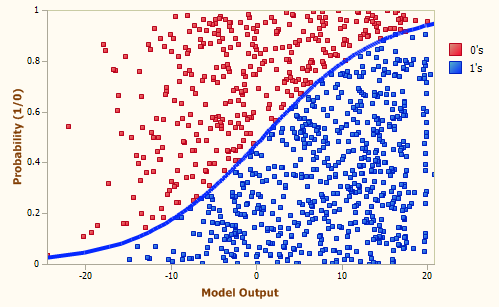
using non-scaled data

In [ ]:
#names=X_train.columns.values ##create a list of column names - to be used later

In [ ]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
##without weights
#logr = LogisticRegression()
#logr.fit(X_train, y_train)
#score = logr.score(X_test, y_test)
#print(score)
#print("")
#log_pred = logr.predict(X_test)
#print(confusion_matrix(y_test, log_pred))
#print("")
#print(classification_report(y_test, log_pred))

# --------------------------------------------------------------------------------
# XXXXXXXXXXXXXXXXX  Fine Tune the Model XXXXXXXXXXXXXXXXX
# --------------------------------------------------------------------------------

### Logistic Regression w/ Scaler and weights

In [ ]:
#logrsc = LogisticRegression(class_weight = {0:1, 1:3})
#logrsc.fit(X_train_sc, y_train)
#score = logrsc.score(X_test_sc, y_test)
#score

In [ ]:
#scaled_pred = logrsc.predict(X_test_sc)

In [ ]:
#print(classification_report(y_test, scaled_pred))

In [ ]:
#print(confusion_matrix(y_test, scaled_pred))

### Decision Tree
![Decision-Tree-Algorithms.png](images/Decision-Tree-Algorithms.png)

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.tree import DecisionTreeClassifier

In [ ]:
#classifier=DecisionTreeClassifier()
#classifier=classifier.fit(X_train,y_train)

In [ ]:
#df_pred = classifier.predict(X_test)
#print("Confusion Matrix")
#print(confusion_matrix(y_test, df_loanpred))
#print("")
#print("classification Report")
#print(classification_report(y_test, df_loanpred))

In [ ]:
##Generating decision tree in a file(image)
#from sklearn import tree
#from io import StringIO
#from IPython.display import Image, display

In [ ]:
#out = StringIO()
#tree.export_graphviz(classifier, out_file=out, filled=True,rounded=True)
#from sklearn.tree import export_graphviz
#import pydot 

In [ ]:
#from sklearn.tree import export_graphviz
#import pydot 

In [ ]:
#dot_data = StringIO()  
#export_graphviz(classifier, out_file=dot_data,filled=True,rounded=True)

#graph = pydot.graph_from_dot_data(dot_data.getvalue())  
#Image(graph[0].create_png())  

In [ ]:
##Using Decision Tree Classifier
#clf2=DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10)
#clf2=clf2.fit(X_train,y_train)
#clf2.score(X_test, y_test)

In [ ]:
#dot_data = StringIO()  
#export_graphviz(clf2, out_file=dot_data, feature_names=loan_names, filled=True,rounded=True)

#graph = pydot.graph_from_dot_data(dot_data.getvalue())  
#Image(graph[0].create_png()) 

In [ ]:
#depth = range(1,12)  ##finds optimal max_depth to reduce complexity 
#scores = []

#for d in depth:
#    classifier=DecisionTreeClassifier(max_depth = d)
#    classifier=classifier.fit(X_train,y_train)
#    scores.append(classifier.score(X_test, y_test))
#    print("iteration {} done".format(d))


#plt.plot(depth, scores, '-o')
#plt.xlabel('depth, d')
#plt.ylabel('scores')
#plt.xticks(depth)
#plt.show()

In [ ]:
#clf3=DecisionTreeClassifier(max_depth = 6, max_leaf_nodes=10)  ##shows the optimal decision tree
#clf3=classifier.fit(X_train,y_train)
#clf3.score(X_test, y_test)

In [ ]:
#dot_data = StringIO()  
#export_graphviz(clf3, out_file=dot_data, feature_names=loan_names, filled=True,rounded=True)

#graph = pydot.graph_from_dot_data(dot_data.getvalue())  
#Image(graph[0].create_png()) 

In [ ]:
#df_loanpred3 = clf3.predict(X_test)
#print("Confusion Matrix")
#print(confusion_matrix(y_test, df_loanpred3))
#print("")
#print("classification Report")
#print(classification_report(y_test, df_loanpred3))

In [ ]:
##looks at the most important features within the model

#dt_fi = pd.DataFrame(classifier.feature_importances_)  

In [ ]:
#names = pd.DataFrame(list(X.columns))
#df_feat_imp = pd.concat([dt_fi, names], axis = 1)

In [ ]:
#df_feat_imp.columns = ['Importance', 'Features']
#df_feat_imp.sort_values('Importance', ascending = False)

### Random Forest
![Ensemble-Algorithms.png](images/Ensemble-Algorithms.png)

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

In [ ]:
#rf = RandomForestClassifier(n_estimators = 90, max_depth = 10)
#rf = rf.fit(X_train, y_train)
#score = rf.score(X_test, y_test)
#print(score)
#rf_pred = rf.predict(X_test)
#print(classification_report(y_test, rf_pred))

In [ ]:
#print(confusion_matrix(y_test, rf_pred))

In [ ]:
##using the scaled data 

#rf = RandomForestClassifier(n_estimators = 90, max_depth = 10)
#rf = rf.fit(X_train_sc, y_train)
#score = rf.score(X_test_sc, y_test)
#print(score)
#rf_pred1 = rf.predict(X_test_sc)
#print(classification_report(y_test, rf_pred1))

In [ ]:
#print(confusion_matrix(y_test, rf_pred1))

In [ ]:
#fi = pd.DataFrame(rf.feature_importances_)

In [ ]:
#columns = pd.DataFrame(list(X.columns))

In [ ]:
#features = pd.concat([columns, fi], axis = 1)
#features.columns = ['Feature', 'Importance']

In [ ]:
#features.sort_values("Importance", ascending = False)

# Using Grid Search to find the optimal model configuration

In [ ]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.pipeline import Pipeline

In [ ]:
## Create a pipeline
#pipe = Pipeline([('classifier', RandomForestClassifier())])

## Create space of candidate learning algorithms and their hyperparameters for Logistic and Randon Forest
#search_space = [{'classifier': [LogisticRegression()],
#                 'classifier__penalty': ['l1', 'l2'],
#                 'classifier__C': np.logspace(0, 4, 10)},
#                {'classifier': [RandomForestClassifier()],
#                 'classifier__n_estimators': [10, 100, 1000],
#                 'classifier__max_features': [1, 2, 3]}]

In [ ]:
## Create grid search 
#clf_best = GridSearchCV(pipe, search_space, cv=5, verbose=0)

In [ ]:
## Fit grid search
#best_model = clf_best.fit(X_train, y_train)

In [ ]:
## View best model
#best_model.best_estimator_.get_params()['classifier']

In [ ]:
#best_model.predict(X_test)

In [ ]:
#score = best_model.score(X_test, y_test)
#print("Accuracy Score")
#print(score)
#best_model_pred = best_model.predict(X_test)
#print("")
#print("Confusion Matrix")
#print(confusion_matrix(y_test, best_model_pred))
#print("")
#print("Confusion Matrix")
#print(classification_report(y_test, best_model_pred))

## Datasets for Regression
![Regression-Algorithms.png](images/Regression-Algorithms.png)

### X will consist of all features and y must be a numerical target variable

### Scikit Simple Regression
using annual_inc as predictor

In [ ]:
#X = df_data.drop(['targetvariable'], axis =1)
#X.info()

In [ ]:
#y = df_data_reg['targetvariable']

In [ ]:
#y

In [ ]:
#y.values.reshape(-1, 1)

In [ ]:
#from sklearn import datasets, linear_model
#from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

In [ ]:
#reg = linear_model.LinearRegression()
#feature1 = X[['feature1']]

In [ ]:
#reg.fit(feature1, y)

In [ ]:
#predictions = reg.predict(feature1)

In [ ]:
#df_predictions = pd.DataFrame(predictions)

In [ ]:
#reg.score(feature1, y)

### Correlation Matrix

In [ ]:
#colormap = plt.cm.viridis
#plt.figure(figsize=(14,12))
#plt.title('Pearson Correlation of Features', y=1.05, size=15)
#sns.heatmap(df_data.astype(float).corr(),linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## Lasso Regression

### find the most significant features 

In [ ]:
#from sklearn.linear_model import Lasso

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
#scaler = StandardScaler()

#X_train_sc = scaler.fit_transform(X_train)
#X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)


#X_test_sc = scaler.fit_transform(X_test)
#X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

### Fine tune the model to find optimal alpha value for Lasso

In [ ]:
#alphas = [0.1, 0.5, 1, 5, 10, 25, 50, 100]
#scores = []

#for a in alphas:
#    lasso = Lasso(alpha = a)
#    lasso.fit(X_train_sc, y_train)
#    scores.append(lasso.score(X_test_sc, y_test))
#    print("iteration {} done".format(a))


#plt.plot(alphas, scores, '-o')
#plt.xlabel('alpha, a')
#plt.ylabel('scores')
#plt.xticks(alphas)
#plt.show()

In [ ]:
#lasso = Lasso(alpha=10.0)  ##use 10.0 if that is considered the best option, replace 10.0 with a different number if needed

In [ ]:
#lasso.fit(X_train_sc, y_train)

In [ ]:
#lasso_pred = lasso.predict(X_train_sc)

In [ ]:
#lasso.score(X_test_sc, y_test)

In [ ]:
#lasso.coef_

In [ ]:
#df_lasso = pd.DataFrame(lasso.coef_)

In [ ]:
#names = pd.DataFrame(list(X.columns))

In [ ]:
#df_lasso = pd.concat([df_lasso, names], axis = 1)

In [ ]:
#df_lasso.columns = ['Coefficient', 'Feature']
#df_lasso

## Ridge

### Import needed libraries

In [ ]:
#from sklearn.linear_model import Ridge

### Fine tune the model to find optimal alpha value

In [ ]:
#alphas = [1, 5, 10, 25, 50, 100, 150, 200, 300, 400, 500]
#scores = []

#for a in alphas:
#    ridge = Ridge(alpha = a)
#    ridge.fit(X_train_sc, y_train)
#    scores.append(ridge.score(X_test_sc, y_test))
#    print("iteration {} done".format(a))


#plt.plot(alphas, scores, '-o')
#plt.xlabel('alpha, a')
#plt.ylabel('scores')
#plt.xticks(alphas)
#plt.show()

In [ ]:
#ridge = Ridge(alpha=150) ##use 150 if that is considered the best option, replace 10.0 with a different number if needed

In [ ]:
#ridge.fit(X_train_sc, y_train)

In [ ]:
#ridge_preds = ridge.predict(X_test_sc)

In [ ]:
#ridge.score(X_test_sc, y_test)

In [ ]:
#df_ridge = pd.DataFrame(ridge.coef_)

#names = pd.DataFrame(list(X.columns))

#df_ridge = pd.concat([df_ridge, names], axis = 1)

#df_ridge.columns = ['Coefficient', 'Feature']
#df_ridge